<div style="background-color: #4CAF50; color: white; padding: 10px; border-radius: 5px; display: flex; align-items: center;">
    <h1 style="margin: 0 auto; font-size: 30px; font-weight: bold; font-family: Helvetica">Lab4: โครงข่ายประสาทเทียม (Neural Networks)</h1>
</div>

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">เครื่องมือที่จะใช้ใน Lab นี้:</h1>

In [1]:
# นำเข้าไลบรารี numpy โดยตั้งชื่อว่า np
import numpy as np
# นำเข้าไลบรารี matplotlib โดยตั้งชื่อว่า plt
import matplotlib.pyplot as plt
# นำเข้าไลบรารี pandas โดยตั้งชื่อว่า pd
import pandas as pd
# นำเข้าไลบรารี seaborn โดยตั้งชื่อว่า sns
import seaborn as sns

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">1. สำรวจและวิเคราะห์ข้อมูลเบื้องต้น (Exploratory Data Analysis: EDA)</h1>

<h1 style="font-size: 18px;">1.1 นำข้อมูลเข้า</h1>

In [2]:
data = pd.read_csv('riceClassification.csv') # อ่านไฟล์ csv ชื่อ 'riceClassification.csv' เราจะได้ตารางของข้อมูล (dataframe) เก็บไว้ในตัวแปรชื่อ data
data.head() # แสดงผล dataframe 5 แถวแรก

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


<h1 style="font-size: 18px;">1.2 สำรวจข้อมูล</h1>

In [3]:
data.info() # แสดงรายละเอียดของแต่ละคอลัมน์ใน data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [4]:
data.describe() # แสดงสถิติเบื้องต้นของแต่ละคอลัมน์ใน dataframe

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [5]:
# ตรวจสอบข้อมูลที่หายไป
data.isnull().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

<h1 style="font-size: 18px;">1.3 คัดเลือกข้อมูล (data cleaning)</h1>

In [49]:
data = data.drop('id', axis=1) # ลบคอลัมน์ที่ชื่อ 'id'
data.head() # แสดงผล dataframe 5 แถวแรก

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


<h1 style="font-size: 18px;">1.4 ดูความสัมพันธ์ของข้อมูล</h1>

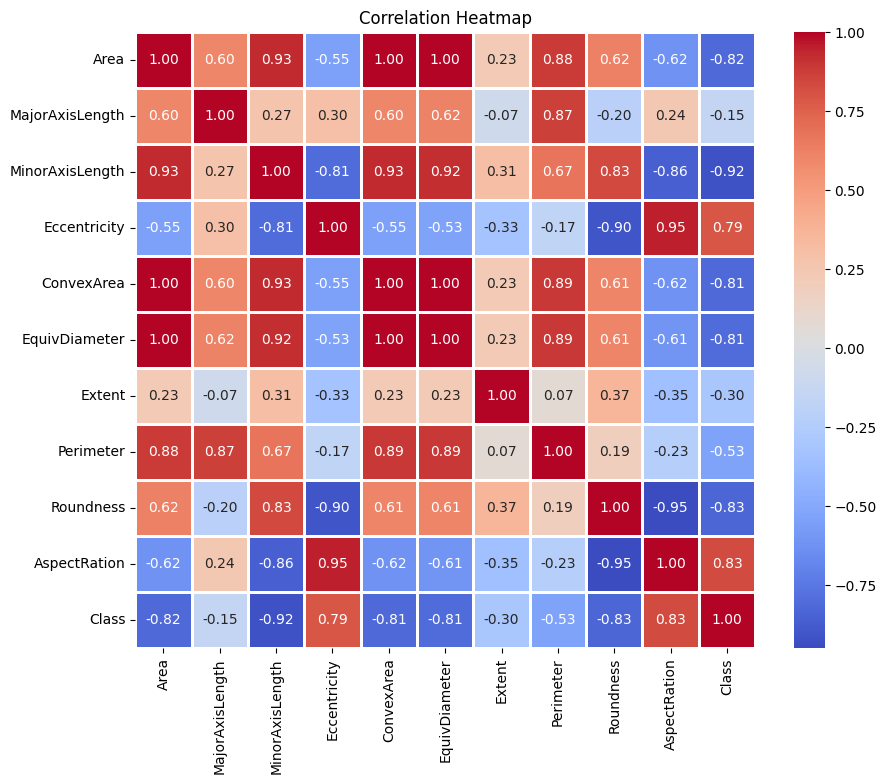

In [50]:
# สร้างกราฟ corelation ของแต่ละคอลัมน์ใน dataframe
corr_matrix = data.corr()  # เรียกดู correlation ของแต่ละคอลัมน์ใน dataframe
plt.figure(figsize=(10, 8)) # กำหนดขนาดของกราฟ
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=2) # สร้างกราฟ correlation matrix 
plt.title('Correlation Heatmap') # ตั้งชื่อกราฟ
plt.show() # แสดงผล

In [51]:
data.corr().Class.sort_values(ascending=False) # แสดงผลคอลัมน์ที่มี correlation กับ 'Price' จากมากไปน้อย

Class              1.000000
AspectRation       0.832563
Eccentricity       0.788636
MajorAxisLength   -0.147741
Extent            -0.303440
Perimeter         -0.533274
EquivDiameter     -0.809361
ConvexArea        -0.814214
Area              -0.816589
Roundness         -0.831759
MinorAxisLength   -0.917766
Name: Class, dtype: float64

<h1 style="font-size: 18px;">1.5 ดูการกระจายตัวของข้อมูล</h1>

1    9985
0    8200
Name: Class, dtype: int64


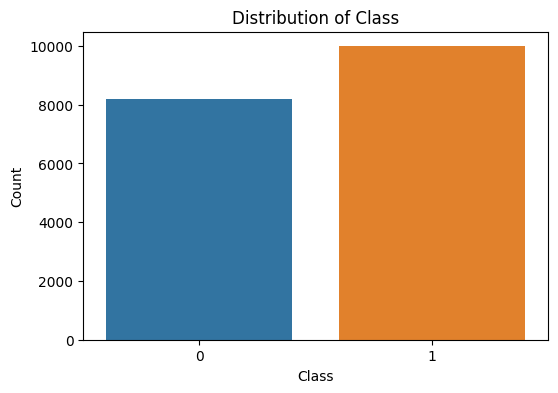

In [52]:
# แสดงจำนวนของแต่ละคลาสในคอลัมน์ 'Class'
class_counts = data['Class'].value_counts()
print(class_counts)

# แสดงการกระจายตัวของคลาสในคอลัมน์ 'Class'
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Class')
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">2. ปรับช่วงของข้อมูล (Feature Scaling)</h1>

In [53]:
# นำเข้าไลบรารี sklearn.preprocessing เพื่อเรียกใช้ StandardScaler
from sklearn.preprocessing import StandardScaler
# นำฟังก์ชัน StandardScaler() เก็บไว้ในตัวแปร pre_process
pre_process = StandardScaler()

<h1 style="font-size: 18px;">2.1 แบ่งข้อมูลเป็นส่วน Features และ Label</h1>

In [54]:
# X เป็น Features
X = data.drop('Class', axis=1)
# y เป็น Label
y = data['Class']

<h1 style="font-size: 18px;">2.2 ทำการ Standardize ข้อมูลส่วน Features</h1>

In [55]:
X = pd.DataFrame(pre_process.fit_transform(X)) # ปรับช่วงของ Features ทั้งหมด
X.head() # แสดงผล dataframe 5 แถวแรก

,0,1,2,3,4,5,6,7,8,9
0,-1.703630,-4.803744,0.417927,-6.393938,-1.696989,-1.830049,0.391654,-2.661778,0.839588,-2.663800
1,-2.838478,-6.220789,-0.835611,-6.209583,-2.803539,-3.398143,0.923070,-4.857318,1.837215,-2.635418
2,-2.718519,-6.091404,-0.771700,-6.024520,-2.725641,-3.213879,1.365122,-4.799860,2.383587,-2.605950
3,-2.701479,-6.031573,-0.783130,-5.781578,-2.708996,-3.188141,1.598635,-4.777995,2.409877,-2.565690
4,-2.278893,-5.377799,-0.341288,-5.433479,-2.279559,-2.580390,1.463045,-4.111042,2.477331,-2.504645


In [56]:
print(type(X)) ; print(type(y)) # แสดง type ของ X และ y ในตอนนี้

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [57]:
X = np.array(X)  # เปลี่ยน type ของ X ให้เป็น array
y = np.array(y)  # เปลี่ยน type ของ y ให้เป็น array
print(type(X)) ; print(type(y)) # แสดง type ของ X และ y ในตอนนี้

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">3. แบ่งส่วนข้อมูล (Train-Test Split)</h1>

In [58]:
# นำเข้าไลบรารี sklearn.model_selection เพื่อเรียกใช้ train_test_split
from sklearn.model_selection import train_test_split

In [59]:
# แบ่งส่วนข้อมูล X เป็น X_train, X_test และ y เป็น y_train, y_test โดยมีอัตราส่วนแบ่งเป็น 0.7:0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)

In [60]:
print('length of X_train:',len(X_train),', length of X_test:', len(X_test)) # แสดงจำนวนข้อมูลใน X_train และ X_test

length of X_train: 12729 , length of X_test: 5456


In [61]:
# หรืออีกวิธีหนึ่ง เราสามารถดู shape ของข้อมูลที่เราแบ่งได้ โดยใช้คำสั่ง .shape 
print('shape of X_train:', X_train.shape)   # ดู shape ของ X_train
print('shape of X_test:', X_test.shape)     # ดู shape ของ X_test
print('shape of y_train:', y_train.shape)   # ดู shape ของ y_train
print('shape of y_test:', y_test.shape)     # ดู shape ของ y_test

shape of X_train: (12729, 10)
shape of X_test: (5456, 10)
shape of y_train: (12729,)
shape of y_test: (5456,)


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">4. Neural Networks Model from scratch (1 layer)</h1>

In [62]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size):
        # เราจะสุ่มค่า weights และ bias ตอนแรกเริ่ม
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, 1) * 0.01
        self.b2 = np.zeros((1, 1))
    
    @staticmethod
    def sigmoid(z):  # ฟังก์ชัน Sigmoid
        return 1 / (1 + np.exp(-z))
    
    @staticmethod    # อนุพันธ์ของฟังก์ชัน Sigmoid
    def sigmoid_derivative(z):
        s = 1 / (1 + np.exp(-z))
        return s * (1 - s)
    
    def forward_propagation(self, X): # การทำ Forward Propagation
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.sigmoid(self.Z2)
        return self.A2
    
    def compute_cost(self, y): # คำนวณค่า Cost
        m = y.shape[0]
        cost = -np.mean(y * np.log(self.A2) + (1 - y) * np.log(1 - self.A2))
        return cost
    
    def backward_propagation(self, X, y): # การทำ Backward Propagation
        m = X.shape[0]

        self.dZ2 = self.A2 - y
        self.dW2 = np.dot(self.A1.T, self.dZ2) / m
        self.db2 = np.sum(self.dZ2, axis=0, keepdims=True) / m

        self.dZ1 = np.dot(self.dZ2, self.W2.T) * self.sigmoid_derivative(self.Z1)
        self.dW1 = np.dot(X.T, self.dZ1) / m
        self.db1 = np.sum(self.dZ1, axis=0, keepdims=True) / m
    
    def update_parameters(self, learning_rate): # อัพเดท w และ b
        self.W1 -= learning_rate * self.dW1
        self.b1 -= learning_rate * self.db1
        self.W2 -= learning_rate * self.dW2
        self.b2 -= learning_rate * self.db2
    
    def train(self, X_train, y_train, X_test, y_test, epochs, learning_rate):
        # เราอยากเก็บ training history ไว้ เพราะฉะนั้นจึงสร้างตัวแปร dictionary ชื่อ 'history' เพื่อเก็บค่าต่างๆระหว่างการ train ไว้
        history = {
            "train_cost": [],
            "train_accuracy": [],
            "test_cost": [],
            "test_accuracy": []
        }
        
        y_train_reshaped = y_train.reshape(-1, 1)
        y_test_reshaped = y_test.reshape(-1, 1)
        
        for i in range(epochs):
            # ทำ Forward และ Backward propagation กับ training data
            self.forward_propagation(X_train)
            train_cost = self.compute_cost(y_train_reshaped)
            self.backward_propagation(X_train, y_train_reshaped)
            self.update_parameters(learning_rate)

            # คำนวณ training accuracy
            train_accuracy = self.evaluate(X_train, y_train_reshaped)
            
            # คำนวณ test cost และ test accuracy
            self.forward_propagation(X_test)
            test_cost = self.compute_cost(y_test_reshaped)
            test_accuracy = self.evaluate(X_test, y_test_reshaped)
            
            # เก็บค่าที่ได้ไว้ในตัวแปร history
            history["train_cost"].append(train_cost)
            history["train_accuracy"].append(train_accuracy)
            history["test_cost"].append(test_cost)
            history["test_accuracy"].append(test_accuracy)
            
            # แสดงผลว่าเทรนถึงรอบที่เท่าไรแล้ว
            if i % 100 == 0 or i == epochs - 1:
                print(f"Epoch {i + 1} / {epochs}")
                print(f"Train Cost: {train_cost}, Train Accuracy: {train_accuracy*100:.2f}%")
                print(f"Test Cost: {test_cost}, Test Accuracy: {test_accuracy*100:.2f}%")
                print("-"*50)
                
        return history
    
    def predict(self, X): # ทำนาย test data
        predictions = self.forward_propagation(X)
        return (predictions > 0.5).astype(int)
    
    def evaluate(self, X, y): # คำนวณค่า accuracy
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy

In [63]:
nn = NeuralNetwork(input_size=X_train.shape[1], hidden_size=15) # กำหนดค่าเริ่มต้น
history = nn.train(X_train, y_train, X_test, y_test, epochs=1000, learning_rate=0.05) # เทรนโมเดล

train_accuracy = nn.evaluate(X_train, y_train.reshape(-1, 1)) # คำนวณค่า train accuracy ตอนสุดท้าย
test_accuracy = nn.evaluate(X_test, y_test.reshape(-1, 1)) # คำนวณค่า test accuracy ตอนสุดท้าย

print(f"Training accuracy: {train_accuracy * 100:.2f}%") # แสดงผลค่า train accuracy ที่คำนวณได้
print(f"Test accuracy: {test_accuracy * 100:.2f}%") # แสดงผลค่า test accuracy ที่คำนวณได้

Epoch 1 / 1000
Train Cost: 0.6935816247492151, Train Accuracy: 54.91%
Test Cost: 0.6929736733682657, Test Accuracy: 54.91%
--------------------------------------------------


Epoch 101 / 1000
Train Cost: 0.6825725169142315, Train Accuracy: 54.91%
Test Cost: 0.6823836267992164, Test Accuracy: 54.91%
--------------------------------------------------
Epoch 201 / 1000
Train Cost: 0.6318725459356384, Train Accuracy: 54.91%
Test Cost: 0.6303778879127595, Test Accuracy: 54.91%
--------------------------------------------------
Epoch 301 / 1000
Train Cost: 0.40435043234362644, Train Accuracy: 95.25%
Test Cost: 0.4006458700889237, Test Accuracy: 94.98%
--------------------------------------------------
Epoch 401 / 1000
Train Cost: 0.20556089979955253, Train Accuracy: 97.85%
Test Cost: 0.20253590422107268, Test Accuracy: 98.00%
--------------------------------------------------
Epoch 501 / 1000
Train Cost: 0.12925814765303772, Train Accuracy: 98.27%
Test Cost: 0.12616585249820525, Test Accuracy: 98.48%
--------------------------------------------------
Epoch 601 / 1000
Train Cost: 0.09702721627066789, Train Accuracy: 98.36%
Test Cost: 0.09358323209249726, Test Accur

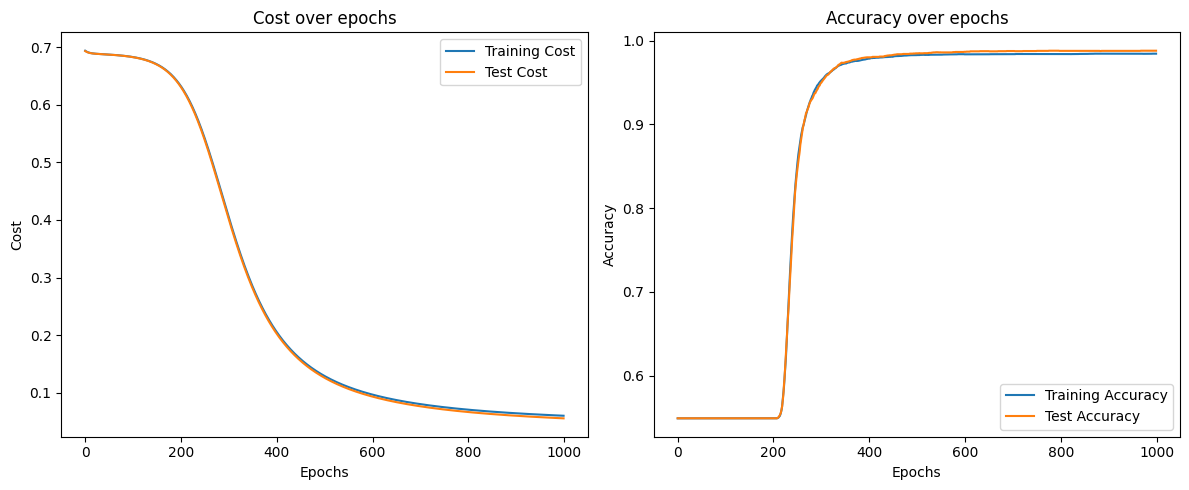

In [64]:
train_cost = history['train_cost'] 
train_accuracy = history['train_accuracy']
test_cost = history['test_cost']
test_accuracy = history['test_accuracy']

# แสดงกราฟประวัติค่า cost ที่เกิดขึ้นระหว่างการเทรนโมเดล 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_cost, label='Training Cost')
plt.plot(test_cost, label='Test Cost')
plt.title('Cost over epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()

# แสดงกราฟประวัติค่า accuracy ที่เกิดขึ้นระหว่างการเทรนโมเดล 
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [65]:
predictions = nn.predict(X_test[28])
print('prediction is class:', predictions[0][0])

prediction is class: 0


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">5. การใช้ Neural Networks Model ด้วย Scikit-Learn Library</h1>

In [66]:
 # นำเข้าไลบรารี sklearn.neural_network เพื่อเรียกใช้ MLPClassifier
from sklearn.neural_network import MLPClassifier

<h1 style="font-size: 18px;">5.1 สร้างโมเดล และ กำหนดการ compile ของโมเดล</h1>

In [67]:
# สร้างโมเดล
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32, 16), # กำหนด Input layer, Hidden Layers
    activation='relu',               # Activation function ที่จะใช้
    solver='adam',                   # Optimizer ที่จะใช้
    alpha=0.0001,                    # คือพารามิเตอร์ L2 penalty (regularization term
    batch_size=32,                   # สำหรับ SGD Algotithm
    max_iter=50,                     # จำนวนรอบการเทรน
    verbose=True,                    # แสดงผลระหว่างเทรน
    random_state=42                  # ควบคุมการทำผลซ้ำ
)

<h1 style="font-size: 18px;">5.2 เทรนโมเดล</h1>

In [68]:
# Train the model
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.08547221
Iteration 2, loss = 0.03443003
Iteration 3, loss = 0.03391904
Iteration 4, loss = 0.03328007
Iteration 5, loss = 0.03238244
Iteration 6, loss = 0.03178834
Iteration 7, loss = 0.03171181
Iteration 8, loss = 0.03169699
Iteration 9, loss = 0.03128206
Iteration 10, loss = 0.03151062
Iteration 11, loss = 0.03041643
Iteration 12, loss = 0.03048641
Iteration 13, loss = 0.03045925
Iteration 14, loss = 0.03002470
Iteration 15, loss = 0.03027431
Iteration 16, loss = 0.03018347
Iteration 17, loss = 0.02941624
Iteration 18, loss = 0.02986222
Iteration 19, loss = 0.02932123
Iteration 20, loss = 0.02903770
Iteration 21, loss = 0.02989663
Iteration 22, loss = 0.02935881
Iteration 23, loss = 0.02861497
Iteration 24, loss = 0.02902082
Iteration 25, loss = 0.02848671
Iteration 26, loss = 0.02931791
Iteration 27, loss = 0.02922898
Iteration 28, loss = 0.02817995
Iteration 29, loss = 0.02843261
Iteration 30, loss = 0.02860677
Iteration 31, loss = 0.02848972
Iteration 32, los

c:\Users\makor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=32, hidden_layer_sizes=(64, 32, 16), max_iter=50,
              random_state=42, verbose=True)

<h1 style="font-size: 18px;">5.3 ใช้โมเดลที่เทรนแล้ว ทำนายข้อมูล unseen data อย่าง X_test</h1>

In [69]:
y_pred_mlp = mlp.predict(X_test)
y_proba = mlp.predict_proba(X_test)

In [70]:
y_pred_mlp

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [71]:
y_proba

array([[2.21594364e-04, 9.99778406e-01],
       [1.00000000e+00, 2.97713772e-14],
       [9.99999998e-01, 1.87238773e-09],
       ...,
       [1.22901843e-03, 9.98770982e-01],
       [1.13789116e-05, 9.99988621e-01],
       [5.27359434e-04, 9.99472641e-01]])

In [72]:
y_proba.round(2)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [73]:
y_proba = np.argmax(y_proba, axis=1)
y_proba

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">6. การใช้ Neural Networks Model ด้วย Tensorflow-Keras</h1>

In [74]:
from tensorflow.keras.models import Sequential      # นำเข้าไลบรารี tensorflow.keras.models เพื่อเรียกใช้ Sequential
from tensorflow.keras.layers import Dense, Dropout  # นำเข้าไลบรารี tensorflow.keras.layers เพื่อเรียกใช้ Dense, Dropout

<h1 style="font-size: 18px;">6.1 สร้างโมเดล</h1>

In [75]:
# สร้างโมเดล
model = Sequential()

# เพิ่ม layer แรก เรียกว่า Input layer
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
 
# เพิ่ม Hidden layers อื่นๆ
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))

# เพิ่ม layer สุดท้าย เรียกว่า output layer
model.add(Dense(1, activation='sigmoid'))

<h1 style="font-size: 18px;">6.2 กำหนดการ compile ของโมเดล และเทรนโมเดล</h1>

In [76]:
# กำหนดการ compile ของโมเดล
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [77]:
# ดูภาพรวมของโครงสร้างโมเดล
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                704       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,329
Trainable params: 3,329
Non-traina

In [78]:
# เทรนโมเดล
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50


319/319 [==============================] - 2s 2ms/step - loss: 0.1262 - accuracy: 0.9684 - val_loss: 0.0528 - val_accuracy: 0.9819
Epoch 2/50
319/319 [==============================] - 1s 2ms/step - loss: 0.0463 - accuracy: 0.9865 - val_loss: 0.0538 - val_accuracy: 0.9827
Epoch 3/50
319/319 [==============================] - 1s 2ms/step - loss: 0.0439 - accuracy: 0.9873 - val_loss: 0.0487 - val_accuracy: 0.9839
Epoch 4/50
319/319 [==============================] - 1s 2ms/step - loss: 0.0433 - accuracy: 0.9877 - val_loss: 0.0478 - val_accuracy: 0.9831
Epoch 5/50
319/319 [==============================] - 1s 2ms/step - loss: 0.0409 - accuracy: 0.9880 - val_loss: 0.0471 - val_accuracy: 0.9843
Epoch 6/50
319/319 [==============================] - 1s 2ms/step - loss: 0.0382 - accuracy: 0.9893 - val_loss: 0.0488 - val_accuracy: 0.9831
Epoch 7/50
319/319 [==============================] - 1s 2ms/step - loss: 0.0403 - accuracy: 0.9885 - val_loss: 0.0451 - val_accuracy: 0.9851
Epoch 8/50
319/31

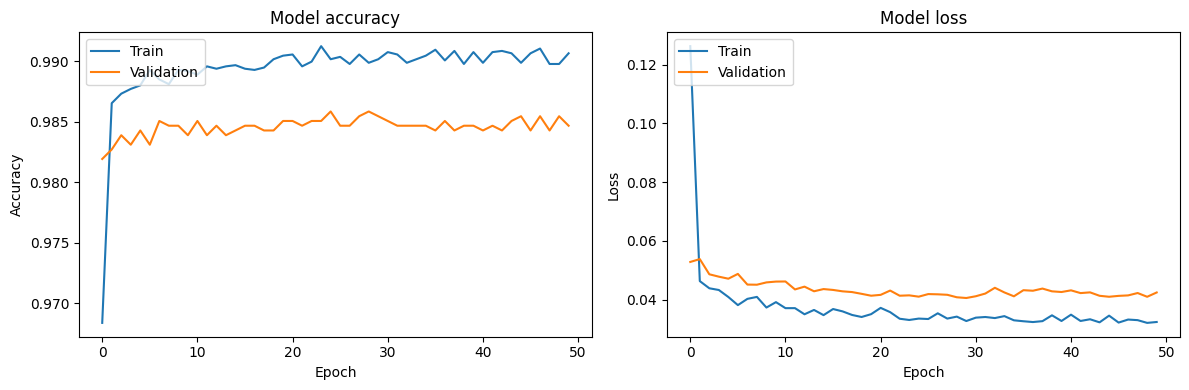

In [79]:
plt.figure(figsize=(12, 4))

# แสดงกราฟประวัติค่า accuracy ที่เกิดขึ้นระหว่างการเทรนโมเดล
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# แสดงกราฟประวัติค่า loss ที่เกิดขึ้นระหว่างการเทรนโมเดล
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

<h1 style="font-size: 18px;">6.4 ใช้โมเดลที่เทรนแล้ว ทำนายข้อมูล unseen data อย่าง X_test</h1>

In [80]:
y_pred = model.predict(X_test) # ให้โมเดลทำนาย Class จาก Features ที่กำหนดให้
print(y_pred)

171/171 [==============================] - 0s 949us/step
[[9.9089134e-01]
 [3.1706332e-10]
 [1.8807577e-07]
 ...
 [9.9062288e-01]
 [9.9997455e-01]
 [9.9391431e-01]]


In [81]:
y_pred = (y_pred >= 0.5).astype(int) # ตั้ง Treshold ในการตัดสินใจว่าเป็นคลาสใด
y_pred

array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [82]:
y_pred = np.array(y_pred.flatten())  # ลด dimension ของ y_pred ให้เท่ากับ y_test

print('y_pred:', y_pred)
print('y_test:', y_test)

y_pred: [1 0 0 ... 1 1 1]
y_test: [1 0 0 ... 1 1 1]


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">7. การวัดผลโมเดล (Model Evaluation)</h1>

ในการวัดผลการทำ Binary-Classification Model เราต้องรู้จัก Confusion Matrix ก่อน

In [83]:
from sklearn.metrics import confusion_matrix  # นำเข้าไลบรารี sklearn.metrics เพื่อเรียกใช้ confusion_matrix

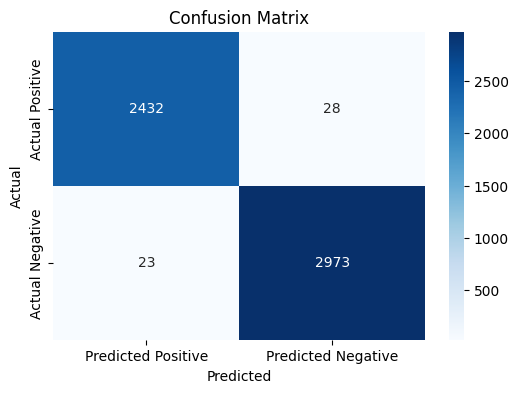

In [84]:
# สร้าง confusion matrix
conf_matrix_sample = confusion_matrix(y_test, y_pred)

# แสดง confusion matrix โดยใช้ไลบรารี seaborn
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_sample, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Positive", "Predicted Negative"],
            yticklabels=["Actual Positive", "Actual Negative"])

plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

จาก Confusion Matrix ด้านบน เราจึงได้ว่า
<div style=" border-radius: 5px; display: flex; align-items: center;">
<h1 style="margin: 0 auto; font-size: 18px; font-weight: bold;">True Positive (TP) = 2432</h1>
<h1 style="margin: 0 auto; font-size: 18px; font-weight: bold;">False Positive (FP) = 25</h1>
<h1 style="margin: 0 auto; font-size: 18px; font-weight: bold;">False Negative (FN) = 28</h1>
<h1 style="margin: 0 auto; font-size: 18px; font-weight: bold;">True Negative (TN) = 2971</h1>
</div>

<h1 style="font-size: 18px; font-weight: bold;">7.1 Accuracy - ค่าความแม่นยำ</h1>

- ความแม่นยำ เป็นตัววัดประสิทธิภาพที่เข้าใจได้ง่ายที่สุด มันคืออัตราส่วนของการทำนายที่ถูกต้องต่อการทำนายทั้งหมด
- สูตร:
$$\text{Accuracy} = \frac{\text{จำนวนการทำนายที่ถูกต้อง}}{\text{จำนวนการทำนายทั้งหมด}}$$
- หรือ:
$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

<h1 style="font-size: 18px; font-weight: bold;">7.2 Precision - ความแม่นยำของการทำนายคลาสบวก</h1>

- Precision คืออัตราส่วนของการทำนายคลาสบวกที่ถูกต้องต่อการทำนายคลาสบวกทั้งหมด:
- สูตร:
$$\text{Precision} = \frac{\text{TP}}{\text{TP + FP}}$$

<h1 style="font-size: 18px; font-weight: bold;">7.3 Recall / Sensitivity - ความครอบคลุม</h1>

- คืออัตราส่วนของการทำนายคลาสบวกที่ถูกต้องต่อคลาสบวกทั้งหมดในข้อมูลจริง:
- สูตร:
$$\text{Recall} = \frac{\text{TP}}{\text{TP + FN}}$$

<h1 style="font-size: 18px; font-weight: bold;">7.4 F1-Score - คะแนน F1 </h1>

- เป็นค่าเฉลี่ยแบบ harmonic ระหว่างความแม่นยำของการทำนายคลาสบวกและความครอบคลุม
- เป็นวิธีที่ดีในการแสดงประสิทธิภาพของโมเดลเมื่อข้อมูลบวกและข้อมูลลบมีจำนวนที่ไม่เท่ากัน:
- สูตร:
$$\text{คะแนน F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

<h1 style="font-size: 18px; font-weight: bold;">7.5 Matthew Correlation Coefficient (MCC) - ค่าสหสัมพันธ์แมทธิว </h1>

- คือค่าสหสัมพันธ์ระหว่างการทำนายและข้อมูลจริง ค่านี้จะอยู่ระหว่าง -1 และ 1 ซึ่งค่า 1 หมายถึงการทำนายที่ดีที่สุด ค่า -1 หมายถึงการทำนายที่แย่ที่สุด และค่า 0 หมายถึงการทำนายแบบสุ่ม:
- สูตร:
$$\text{MCC} = \frac{\text{TP} \times \text{TN} - \text{FP} \times \text{FN}}{\sqrt{(\text{TP} + \text{FP})(\text{TP} + \text{FN})(\text{TN} + \text{FP})(\text{TN} + \text{FN})}}$$


In [85]:
#นำเข้าไลบรารี sklearn.metrics เพื่อเรียกใช้ accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

In [86]:
# คำนวณผลของ metrics ต่างๆ
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# แสดงผล
print(f"ความแม่นยำ (Accuracy): {accuracy:.4f}")
print(f"ความแม่นยำของการทำนายคลาสบวก (Precision): {precision:.4f}")
print(f"ความครอบคลุม (Recall): {recall:.4f}")
print(f"คะแนน F1 (F1-Score): {f1:.4f}")
print(f"ค่าสหสัมพันธ์แมทธิว (MCC): {mcc:.4f}")

ความแม่นยำ (Accuracy): 0.9907
ความแม่นยำของการทำนายคลาสบวก (Precision): 0.9907
ความครอบคลุม (Recall): 0.9923
คะแนน F1 (F1-Score): 0.9915
ค่าสหสัมพันธ์แมทธิว (MCC): 0.9811


<h1 style="font-size: 18px; font-weight: bold;">7.6 Classification Report</h1>

In [87]:
from sklearn.metrics import classification_report # นำเข้าไลบรารี sklearn.metrics เพื่อเรียกใช้ classification_report

In [88]:
# คำสั่งเรียกดู classification report
report = classification_report(y_test, y_pred)
# แสดงผล
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2460
           1       0.99      0.99      0.99      2996

    accuracy                           0.99      5456
   macro avg       0.99      0.99      0.99      5456
weighted avg       0.99      0.99      0.99      5456

